# Final Projek 1 

# Daftar Isi

- Perkenalan
- Import Pustaka
- Data Loading
- Data Cleaning
- Eksplorasi Data
- Data Preprocessing
- Model
- Evaluasi Model
- Kesimpulan

# Perkenalan

Anggota Kelompok :
- Aina Jefelina Nuur
- Herwinda Kurniadewi

## Latar Belakang
- Terdapat dua aplikasi pesanan taksi online terkenal di New York, Amerika yaitu Uber dan Lyft. Tentunya kedua aplikasi tersebut akan memberikan harga yang bersaing untuk dipilih oleh konsumennya. Hal ini menimbulkan beberapa pertanyaan:
    - Bagaimana perbedaan harga yang signifikan dari kedua aplikasi tersebut ?
    - faktor apa saja yang digunakan dari kedua aplikasi tersebut dalam menentukan harga?

## Data
- data yang digunakan bersumber dari kaggle dengan judul 'Uber and Lyft Dataset Boston, MA' yang berisi 57 kolom dengan 693071 baris. Kolom terdiri dari beberapa fitur yang dapat dipertimbangkan untuk penentuan harga dari kedua aplikasi tersebut yaitu distance, cab_type, timestamp, cuaca, suhu, dan masih banyak lagi. 
- data ini merupakan data pemesanan taksi online oleh pelanggan yang dikumpulkan pada 26 November - 19 Desember 2018.
- secara garis besar untuk menentukan perbandingan harga antara Lyft dan Uber akan dilakukan pemisahan dataset antara kedua aplikasi tersebut dan membandingkannya dengan faktor - faktor yang berpengaruh sangat signifikan dengan penentuan harganya.

## Tujuan
- diharapkan nantinya dapat diperoleh perbandingan harga antara Lyft dan Uber, faktor apa saja yang mempengaruhi penentuan harga, serta cara penentuan harga dari kedua aplikasi tersebut dengan menggunakan model regresi linear

# Import Pustaka

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor


import pickle
%matplotlib inline

# Data Loading

In [2]:
# load dataset & output 10 sample data
df= pd.read_csv('Dataset/rideshare_kaggle.csv', low_memory=False)
pd.set_option('display.max_columns', None)
df.sample(3)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
211086,10ee5a3f-9c9c-4c58-b849-916b022b14d9,1.543432e+09,19,28,11,2018-11-28 19:01:26,America/New_York,Boston University,Beacon Hill,Lyft,lyft_premier,Lux,16.5,2.70,1.0,42.3503,-71.0810,41.47,35.66,Overcast,Mostly cloudy throughout the day.,0.0000,0.00,0.63,9.54,14.86,1543431600,10.000,42.72,1543438800,37.59,1543485600,36.75,1543438800,32.25,1543478400,cloudy,29.72,991.85,295,1.00,0,10.000,354.2,1543405940,1543439725,0.72,0.0000,1543420800,33.82,1543399200,42.72,1543438800,30.19,1543399200,36.75,1543438800
74597,b82eb9da-cadc-4a9f-afd3-5a649f36df71,1.543332e+09,15,27,11,2018-11-27 15:21:22,America/New_York,Northeastern University,North Station,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,3.24,1.0,42.3519,-71.0643,40.49,34.08,Overcast,Light rain in the morning.,0.0003,0.15,0.89,10.42,14.77,1543338000,5.011,46.72,1543320000,33.65,1543399200,43.70,1543320000,29.88,1543399200,cloudy,37.50,989.46,247,1.00,1,5.011,335.7,1543319469,1543353347,0.68,0.1422,1543338000,35.90,1543377600,46.72,1543320000,31.81,1543377600,43.70,1543320000
15673,da9a7a69-53ee-41a7-9651-657614d9fd17,1.543466e+09,4,29,11,2018-11-29 04:35:07,America/New_York,Theatre District,Northeastern University,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,26.0,1.80,1.0,42.3519,-71.0551,38.18,32.09,Mostly Cloudy,Mostly cloudy throughout the day.,0.0000,0.00,0.70,8.52,9.67,1543431600,10.000,42.60,1543438800,37.33,1543489200,36.56,1543435200,31.82,1543478400,partly-cloudy-night,29.13,998.75,303,0.59,0,10.000,346.7,1543405934,1543439719,0.72,0.0000,1543420800,33.70,1543399200,42.60,1543438800,29.88,1543399200,36.56,1543435200


In [3]:
# dimensi dataset
df.shape

(693071, 57)

- data terdiri dari 57 kolom dengan 693071 data pesanan atau baris

In [4]:
# mengecek nilai baris yang terduplikasi
df[df.duplicated()].sum().sum()

0.0

- tidak ada baris/nilai yang sama

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

- Dari hasil diatas bisa dilihat adanya data yang hilang pada kolom 'price'

In [6]:
# pada kolom 'price' terdapat data yang hilang
# menghapus baris dengan nilai 'price' yang hilang
print("data 'price' yang hilang : ", sum(np.isnan(df['price'])))
df.dropna(inplace=True)
print(df.shape)

data 'price' yang hilang :  55095
(637976, 57)


- terdapat 55095 data kosong yang nanti akan mengganggu nilai regresi linear. data yang kosong ini di drop dari data set

In [7]:
print('jam :', (sorted(df.hour.unique())))
print('bulan :', (sorted(df.month.unique())))
print('tanggal :', (sorted(df.day.unique())))

jam : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
bulan : [11, 12]
tanggal : [1, 2, 3, 4, 9, 10, 13, 14, 15, 16, 17, 18, 26, 27, 28, 29, 30]


- data yang dicatat selama 24 jam
- dicatat selama 2 bulan yaitu bulan november dan desember. Maka dapat dianggap bahwa bulan pemesanan tidak berpengaruh pada nilai 'price'
- data tidak dicatat setiap hari karena ada tanggal yang tidak disebutkan pada data

In [8]:
pd.crosstab(df.surge_multiplier, df.cab_type)

cab_type,Lyft,Uber
surge_multiplier,,
1.00,286433,330568
1.25,11085,0
1.50,5065,0
1.75,2420,0
2.00,2239,0
2.50,154,0
3.00,12,0


- uber tidak terdapat catatan lonjakan penumpang

# Data Cleaning

In [9]:
# fitur pada dataset
print(df.columns)

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

- terdapat fitur - fitur yang memiliki kemiripan nama seperti time, temperatur, cuaca dengan berbagai kategori dan merupakan data yang tidak terikat dengan price, hal ini perlu kita selidiki lebih lanjut

In [11]:
# Mendapatkan nilai unik dari setiap kolom
for key in df.columns:
  print(df[key].value_counts(),'\n')

424553bb-7174-41ea-aeb4-fe06d4f4b9d7    1
2041f5e2-0a7e-4dc8-a075-4f3697bfb55d    1
a7a68e3e-9fbe-4187-9432-e97b7da5e4fd    1
546ff058-a2ab-4ef6-a47e-6a2f887e57e1    1
73828ebe-4b1f-4791-a171-36f0a739ac1a    1
                                       ..
db26c535-2746-477f-bde8-8dfb8f2a3e5b    1
0d7b6ee0-3846-41be-9767-9f64f983ddbf    1
0fe2518b-0f9d-49a3-b95a-7b9173b33155    1
58281163-da8e-4cb5-91c9-49eb4970c775    1
e7fdc087-fe86-40a5-a3c3-3b2a8badcbda    1
Name: id, Length: 637976, dtype: int64 

1.545000e+09    421
1.543422e+09    150
1.543416e+09    149
1.543402e+09    149
1.543424e+09    148
               ... 
1.543697e+09      1
1.543505e+09      1
1.543404e+09      1
1.544690e+09      1
1.544953e+09      1
Name: timestamp, Length: 35796, dtype: int64 

0     29872
23    29355
17    28075
12    28017
13    27977
14    27976
16    27972
18    27958
11    27946
10    27918
15    27868
22    27093
9     26673
2     26323
1     26310
4     26125
21    25549
3     25530
19    25410
6 

 cloudy                  201429
 partly-cloudy-night     145492
 partly-cloudy-day       106337
 rain                     96170
 clear-night              55577
 clear-day                24679
 fog                       8292
Name: icon, dtype: int64 

28.39    8049
30.16    6895
30.30    5032
28.36    5013
29.86    4881
         ... 
29.31     338
39.64     233
29.15     146
15.46     141
39.62      77
Name: dewPoint, Length: 313, dtype: int64 

996.21     5182
996.92     5032
991.46     4926
995.30     4881
994.99     4611
           ... 
1014.06     390
1014.18     233
991.23      146
1021.33     141
1014.10      77
Name: pressure, Length: 316, dtype: int64 

303    17187
295    14210
297    14194
313    11922
294    10354
       ...  
19      1538
110     1462
91       616
248      338
88       233
Name: windBearing, Length: 195, dtype: int64 

1.00    246511
0.00     36451
0.81     17821
0.77     14797
0.99     13200
         ...  
0.66      1705
0.56      1704
0.09      1703
0.10  

In [12]:
# fitur timezone
print(df.timezone.unique())

['America/New_York']


- pada time zone hanya memiliki 1 data yang sama untuk semua pesanan, maka dapat disimpulkan bahwa fitur timezone tidak mempengaruhi 'price'

In [13]:
# fitur long_summary, short_summary, icon
print('long summary: ', df.long_summary.unique())
print('short summary: ', df.short_summary.unique())
print('icon: ', df.icon.unique())

long summary:  [' Rain throughout the day. '
 ' Rain until morning, starting again in the evening. '
 ' Light rain in the morning. ' ' Partly cloudy throughout the day. '
 ' Mostly cloudy throughout the day. '
 ' Light rain in the morning and overnight. '
 ' Light rain until evening. ' ' Foggy in the morning. '
 ' Overcast throughout the day. ' ' Possible drizzle in the morning. '
 ' Rain in the morning and afternoon. ']
short summary:  [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Cloudy ' ' Overcast '
 ' Light Rain ' ' Foggy ' ' Possible Drizzle ' ' Drizzle ']
icon:  [' partly-cloudy-night ' ' rain ' ' clear-night ' ' cloudy ' ' fog '
 ' clear-day ' ' partly-cloudy-day ']


- ketiga fitur tersebut memiliki kategoti yang hampir sama yaitu berkaitan dengan cuaca
- kita asumsikan bahwa ketiga fitur tersebut saling berhubungan dan dapat diwakili oleh satu fitur yaitu short_summary
- kita dapat menghapus fitur lainnya dari dataset

In [14]:
# fitur time
df1=df[['timestamp','windGustTime', 'temperatureHighTime','temperatureLowTime', 
              'apparentTemperatureHighTime','apparentTemperatureLowTime', 'sunriseTime',
              'sunsetTime','uvIndexTime','temperatureMinTime','temperatureMaxTime',
              'apparentTemperatureMinTime','apparentTemperatureMaxTime']]
print(df.shape)
df1.head(2)

(637976, 57)


,timestamp,windGustTime,temperatureHighTime,temperatureLowTime,apparentTemperatureHighTime,apparentTemperatureLowTime,sunriseTime,sunsetTime,uvIndexTime,temperatureMinTime,temperatureMaxTime,apparentTemperatureMinTime,apparentTemperatureMaxTime
0,1.544953e+09,1545015600,1544968800,1545048000,1544968800,1545044400,1544962084,1544994864,1544979600,1545012000,1544968800,1545012000,1544958000
1,1.543284e+09,1543291200,1543251600,1543298400,1543251600,1543291200,1543232969,1543266992,1543251600,1543233600,1543251600,1543291200,1543251600


<AxesSubplot:>

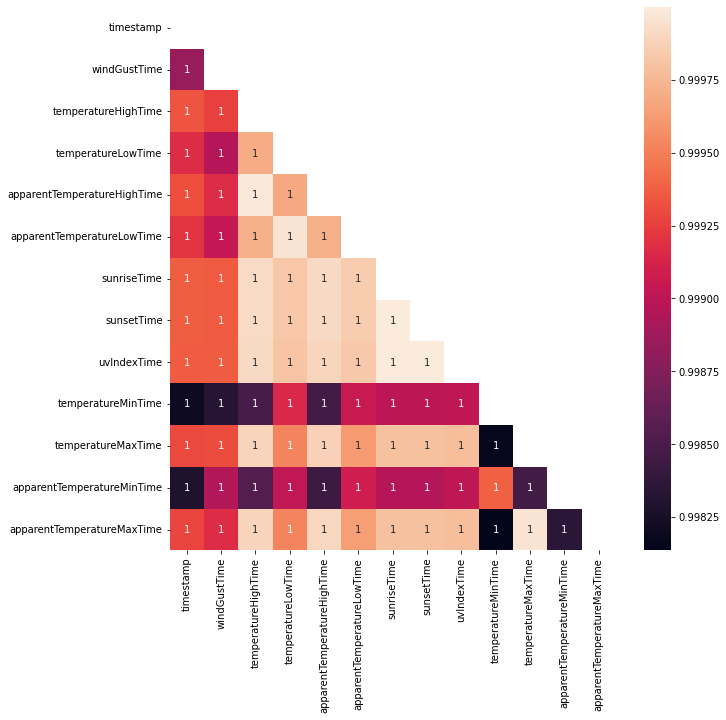

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True, mask=np.triu(df1.corr()))

- fitur time ini memiliki korelasi yang besar satu sama lain
- selain itu fitur time dianggap sudah terwakili dengan hour, day, month
- maka fitur time ini dapat di drop dari dataset

day


<Figure size 432x288 with 0 Axes>

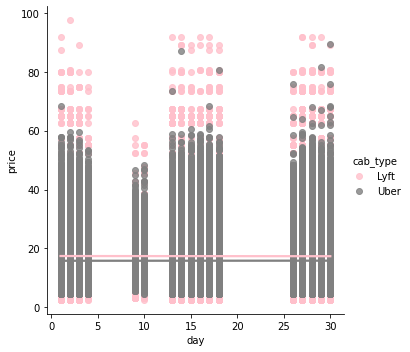

hour


<Figure size 432x288 with 0 Axes>

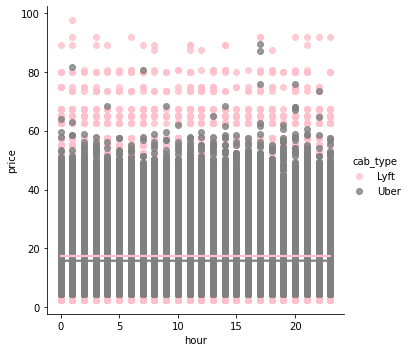

temperature


<Figure size 432x288 with 0 Axes>

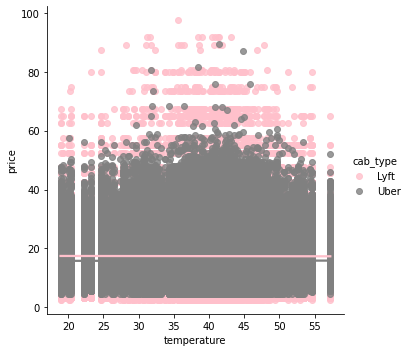

apparentTemperature


<Figure size 432x288 with 0 Axes>

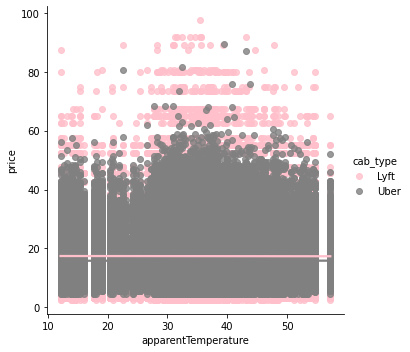

temperatureHigh


<Figure size 432x288 with 0 Axes>

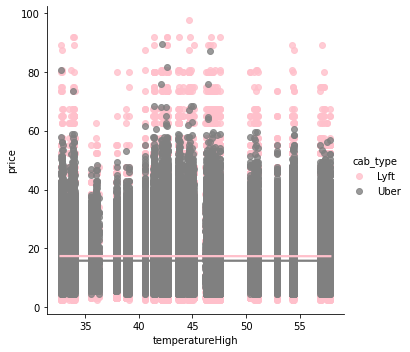

temperatureLow


<Figure size 432x288 with 0 Axes>

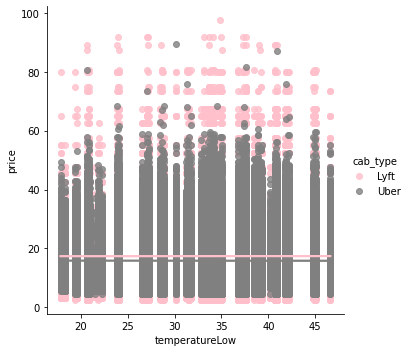

apparentTemperatureHigh


<Figure size 432x288 with 0 Axes>

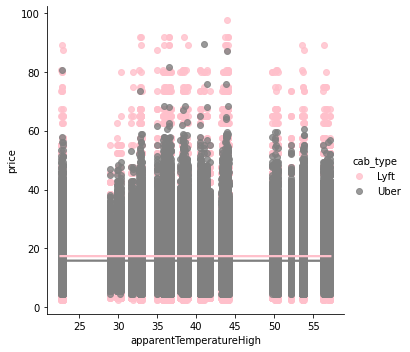

apparentTemperatureLow


<Figure size 432x288 with 0 Axes>

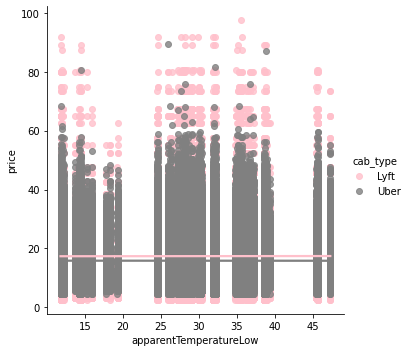

temperatureMin


<Figure size 432x288 with 0 Axes>

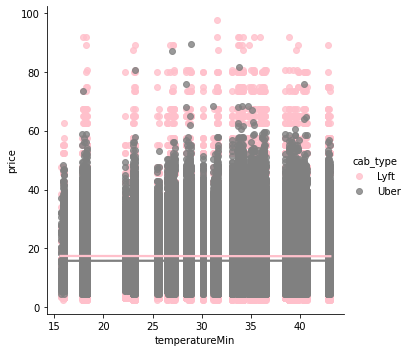

temperatureMax


<Figure size 432x288 with 0 Axes>

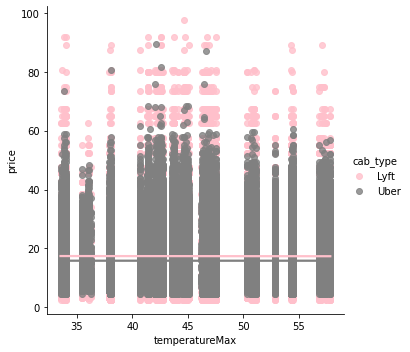

apparentTemperatureMin


<Figure size 432x288 with 0 Axes>

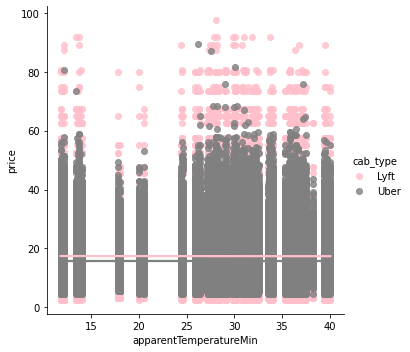

apparentTemperatureMax


<Figure size 432x288 with 0 Axes>

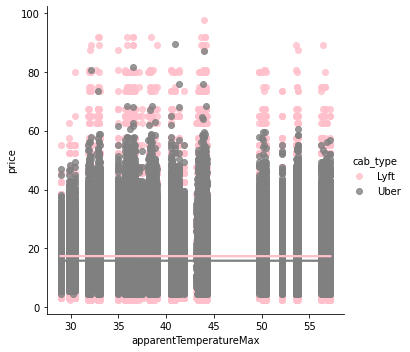

precipIntensity


<Figure size 432x288 with 0 Axes>

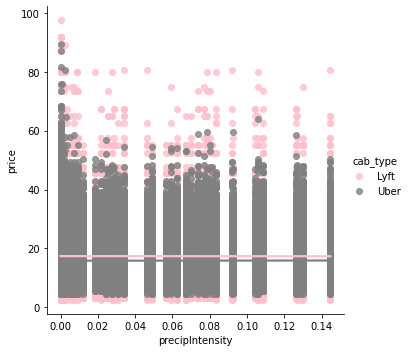

precipProbability


<Figure size 432x288 with 0 Axes>

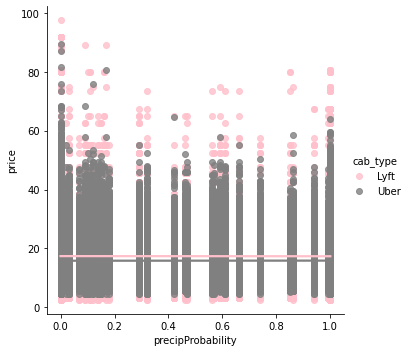

humidity


<Figure size 432x288 with 0 Axes>

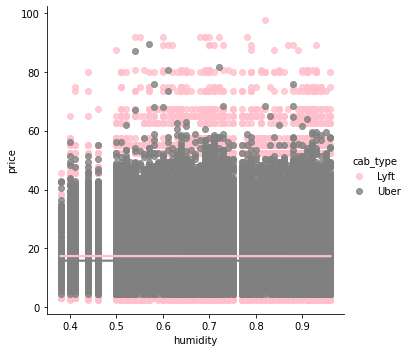

humidity


<Figure size 432x288 with 0 Axes>

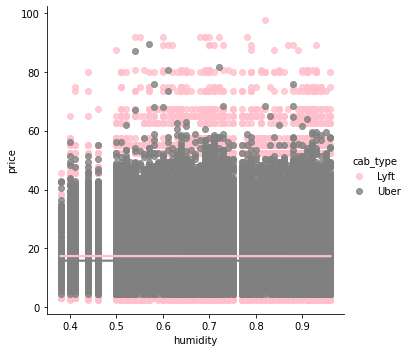

windSpeed


<Figure size 432x288 with 0 Axes>

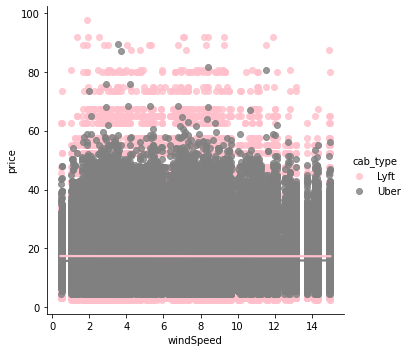

windGust


<Figure size 432x288 with 0 Axes>

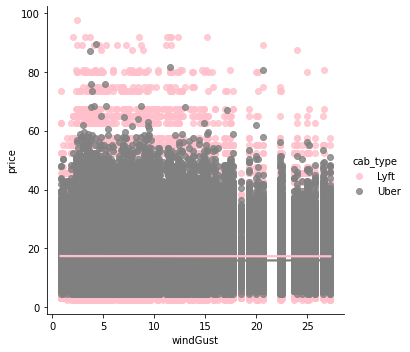

visibility


<Figure size 432x288 with 0 Axes>

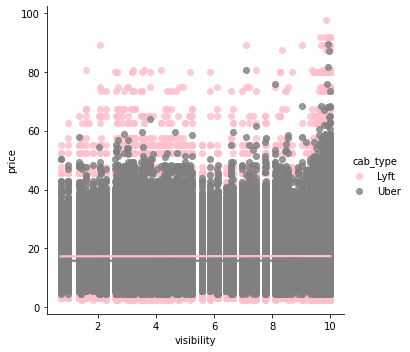

dewPoint


<Figure size 432x288 with 0 Axes>

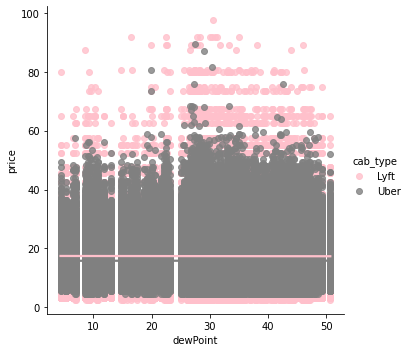

pressure


<Figure size 432x288 with 0 Axes>

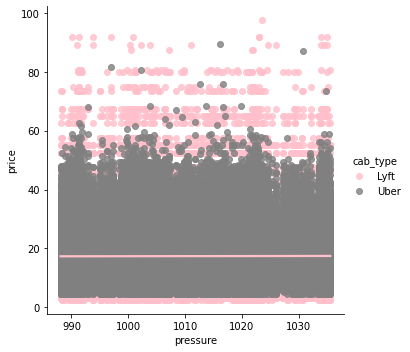

windBearing


<Figure size 432x288 with 0 Axes>

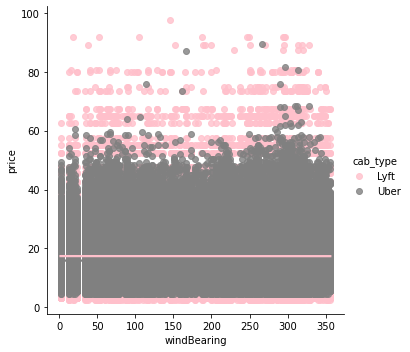

cloudCover


<Figure size 432x288 with 0 Axes>

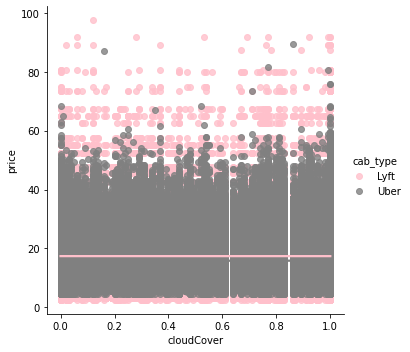

uvIndex


<Figure size 432x288 with 0 Axes>

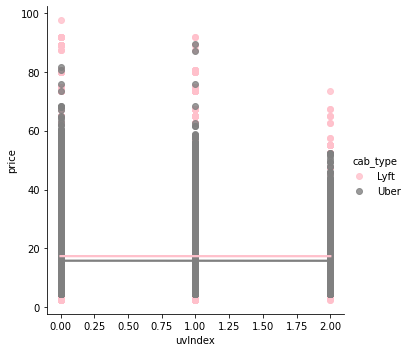

visibility.1


<Figure size 432x288 with 0 Axes>

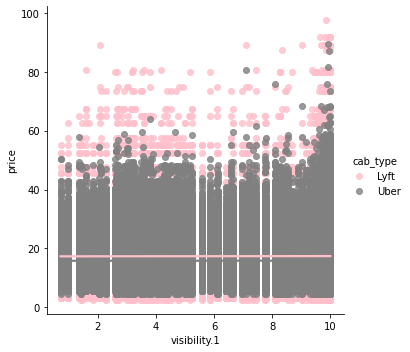

ozone


<Figure size 432x288 with 0 Axes>

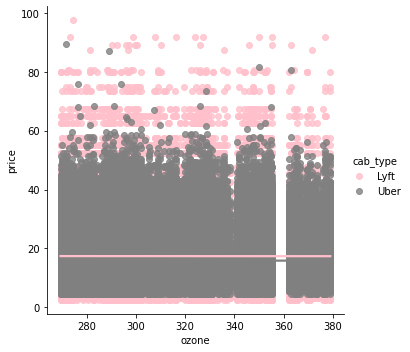

moonPhase


<Figure size 432x288 with 0 Axes>

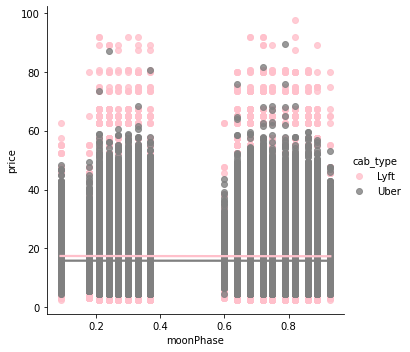

precipIntensityMax


<Figure size 432x288 with 0 Axes>

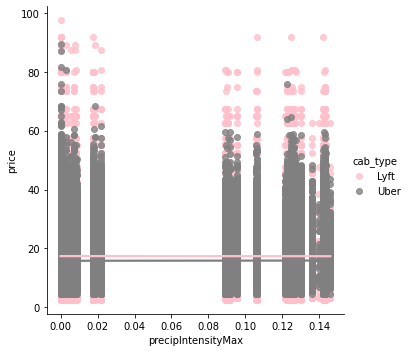

In [16]:
fitur = ['day','hour','temperature','apparentTemperature','temperatureHigh', 'temperatureLow',
            'apparentTemperatureHigh','apparentTemperatureLow','temperatureMin','temperatureMax',
            'apparentTemperatureMin','apparentTemperatureMax','precipIntensity','precipProbability',
            'humidity','humidity','windSpeed','windGust','visibility','dewPoint','pressure','windBearing',
            'cloudCover','uvIndex','visibility.1','ozone','moonPhase','precipIntensityMax']

custom_palette = ['pink', 'grey']
sns.set_palette(custom_palette)

for col in fitur:
    print(col)
    plt.figure()
    sns.lmplot(x=col, y='price', data=df, hue='cab_type', ci=None)
    plt.show()

- dari visualisasi dari beberapa fitur tidak memiliki kecenderungan kenaikan harga pada peningkatan nilai dari fitur atau bersifat konstan dan tidak memiliki keterikatan dengan 'price'
- hal ini menunjukan bahwa fitur yang disebutkan kita asumsikan tidak memiliki pengaruh padapenentuan nilai 'price'

In [17]:
# fitur id merupakan identitas dari setiap pesanan yang tidak terikat dengan 'price' 
# fitur latitude, longitude, source, destination yang kita asumsikan berhubungan dengan 'distance'
# fitur tersebut akan menentukan 'distance' yang ditempuh

In [18]:
# menghapus fitur yang tidak dibutuhkan
df = df.drop(['month','day','hour','datetime','timezone','long_summary','icon','timestamp','datetime',
                      'windGustTime', 'temperatureHighTime','temperatureLowTime', 'apparentTemperatureHighTime',
                      'apparentTemperatureLowTime', 'sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                      'temperatureMaxTime','apparentTemperatureMinTime','apparentTemperatureMaxTime',
                      'temperature','apparentTemperature','temperatureHigh', 'temperatureLow','apparentTemperatureHigh',
                      'apparentTemperatureLow','temperatureMin','temperatureMax','apparentTemperatureMin',
                      'apparentTemperatureMax','precipIntensity','precipProbability','humidity','humidity','windSpeed',
                      'windGust','visibility','dewPoint','pressure','windBearing','cloudCover','uvIndex','visibility.1','ozone',
                      'moonPhase','precipIntensityMax','id','source','destination','latitude','longitude'],axis=1)
print(df.shape)
df.head(2)

(637976, 7)


,cab_type,product_id,name,price,distance,surge_multiplier,short_summary
0,Lyft,lyft_line,Shared,5.0,0.44,1.0,Mostly Cloudy
1,Lyft,lyft_premier,Lux,11.0,0.44,1.0,Rain


- fitur - fitur yang tidak diperlukan dapat dihapus dari dataset untuk mempermudah kita dalam melakukan analisis nantinya

# Eksplorasi Data

In [19]:
# kategori yang ada pada setiap kolom
kategori = df.select_dtypes(include=['object','category']).columns.tolist()
for col in kategori:
    print(f'{col} : {df[col].unique()}')
    print()

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Cloudy ' ' Overcast '
 ' Light Rain ' ' Foggy ' ' Possible Drizzle ' ' Drizzle ']



In [20]:
# menamai ulang kolom dari dataset sesuai dengan nilai dalam kolom
df.rename({"cab_type": "merk", "name": "tipe", "short_summary": "cuaca",
                     "surge_multiplier":"lonjakan", "price":"harga",'distance':'jarak' }, 
                     axis=1, inplace=True)
df.head(2)

,merk,product_id,tipe,harga,jarak,lonjakan,cuaca
0,Lyft,lyft_line,Shared,5.0,0.44,1.0,Mostly Cloudy
1,Lyft,lyft_premier,Lux,11.0,0.44,1.0,Rain


In [21]:
# membagi dataset sesuai dengan merk yaitu Lyft dan Uber
df_lyft = df[:][df.merk == "Lyft"]
df_uber = df[:][df.merk == "Uber"]

In [22]:
# analisis kesamaan product_id dan tipe taksi untuk merk lyft
pd.crosstab(df_lyft.product_id,df_lyft.tipe)

tipe,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared
product_id,,,,,,
lyft,0,0,0,51235,0,0
lyft_line,0,0,0,0,0,51233
lyft_lux,0,51235,0,0,0,0
lyft_luxsuv,0,0,51235,0,0,0
lyft_plus,0,0,0,0,51235,0
lyft_premier,51235,0,0,0,0,0


In [23]:
# analisis kesamaan product_id dan tipe taksi untuk merk uber
pd.crosstab(df_uber.product_id,df_uber.tipe)

tipe,Black,Black SUV,UberPool,UberX,UberXL,WAV
product_id,,,,,,
55c66225-fbe7-4fd5-9072-eab1ece5e23e,0,0,0,55094,0,0
6c84fd89-3f11-4782-9b50-97c468b19529,55095,0,0,0,0,0
6d318bcc-22a3-4af6-bddd-b409bfce1546,0,55096,0,0,0,0
6f72dfc5-27f1-42e8-84db-ccc7a75f6969,0,0,0,0,55096,0
997acbb5-e102-41e1-b155-9df7de0a73f2,0,0,55091,0,0,0
9a0e7b09-b92b-4c41-9779-2ad22b4d779d,0,0,0,0,0,55096


- product_id merupakan kode untuk setiap tipe taksi sehingga kita dapat menggunakan salah satu saja untuk analisis 

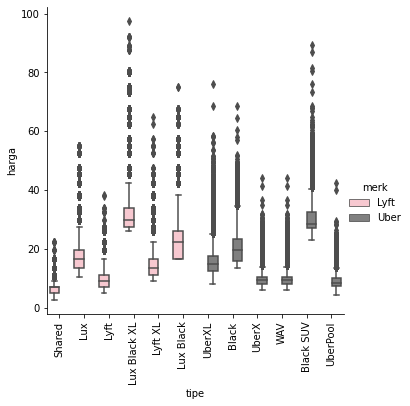

In [24]:
# pengaruh tipe taksi terhadap harga
ax = sns.catplot(x='tipe', y = 'harga', hue='merk', data=df, kind='box')
ax.set_xticklabels(rotation=90)
plt.show()

- memiliki nilai rata - rata harga yang berbeda pada setiap tipe taksi, kita dapat berasumsi bahwa tipe taksi yang digunakan dapat berpengaruh pada penentuan harga

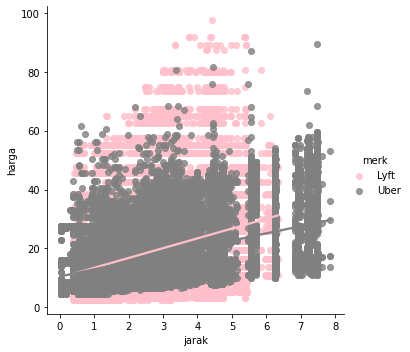

In [25]:
# pengaruh jarak terhadap harga
sns.lmplot(x='jarak', y='harga', hue='merk', data=df, ci=None)

- terbentuk garis yang mengalami peningkatan seiring bertambahnya nilai jarak, kita dapat mengasumsikan bahwa semakin besar jarak yang ditempuh menentukan nilai harga yang harus dibayar

<AxesSubplot:xlabel='harga', ylabel='merk'>

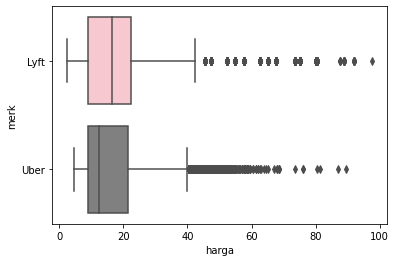

In [26]:
# pengaruh merk taksi terhadap harga
sns.boxplot(x='harga', y='merk', data=df, orient="h")

- terdapat perbedaan nilai rata - rata, minum, maksimum, dan outlier yang berbeda dari kedua merk taksi yang digunakan, kita dapat mengasumsikan bahwa merk taksi yang digunakan berpengaruh pada penentuan harga
- setiap merk yang berbeda akan memberikan nilai harga yang berbeda

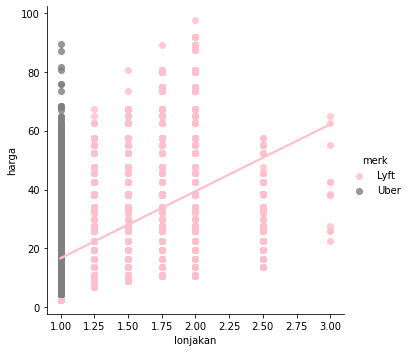

In [27]:
sns.lmplot(x='lonjakan', y='harga', hue='merk', data=df, ci=None)

- sebelumnya diketahui bahwa nilai lonjakan pada merk uber hanya 1, maka dapat diasumsikan harga taksi tidak dipengaruhi oleh lonjakan pesanan
- hal berbeda terjadi pada merk Lyft. Harga pada taksi lyft juga ditentukan oleh besarnya lonjakan pada saat pemesanan

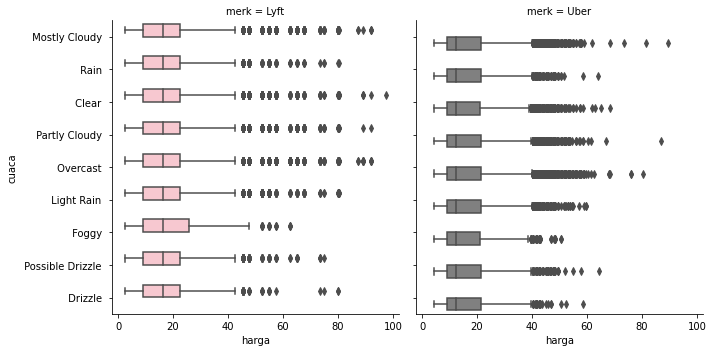

In [28]:
# pengaruh cuaca terhadap harga
sns.catplot(x="harga", y="cuaca", hue="merk", col="merk",data=df, kind="box")

- pada kedua merk dalam berbagai macam cuaca memiliki nilai minimum, dan rata - rata yang sama. Hal ini dapat diasumsikan bahwa cuaca tidak mempengaruhi harga taksi dari kedua merk
- perbedaan pada nilai maksimum dan outlier dapat disebabkan oleh fitur lain, dengan demikian untuk saat ini kita dapat menyingkirkan fitur cuaca dari dataset dengan berasumsi bahwa penentuan harga tidak dipengaruhi oleh cuaca

In [30]:
# menghapus fitur yang tidak dibutuhkan dari dataset
df.drop(['cuaca','product_id'],axis=1, inplace=True)
df_lyft.drop(['cuaca','product_id'],axis=1, inplace=True)
df_uber.drop(['cuaca','product_id'],axis=1, inplace=True)
print('dataset :', df.shape)
print('lyft    :', df_lyft.shape)
print('uber    :', df_uber.shape)

KeyError: "['cuaca' 'product_id'] not found in axis"

# Data Preprocessing

In [31]:
# melabeli data yang akan digunakan
for i in df_lyft.tipe.unique():
    df_lyft[i] = (df_lyft.tipe == i).astype('int')

for i in df_uber.tipe.unique():
    df_uber[i] = (df_uber.tipe == i).astype('int')

In [32]:
print(df_lyft.columns)
df_lyft.head(2)

Index(['merk', 'tipe', 'harga', 'jarak', 'lonjakan', 'Shared', 'Lux', 'Lyft',
       'Lux Black XL', 'Lyft XL', 'Lux Black'],
      dtype='object')


,merk,tipe,harga,jarak,lonjakan,Shared,Lux,Lyft,Lux Black XL,Lyft XL,Lux Black
0,Lyft,Shared,5.0,0.44,1.0,1,0,0,0,0,0
1,Lyft,Lux,11.0,0.44,1.0,0,1,0,0,0,0


In [33]:
print(df_uber.columns)
df_uber.head(2)

Index(['merk', 'tipe', 'harga', 'jarak', 'lonjakan', 'UberXL', 'Black',
       'UberX', 'WAV', 'Black SUV', 'UberPool'],
      dtype='object')


,merk,tipe,harga,jarak,lonjakan,UberXL,Black,UberX,WAV,Black SUV,UberPool
12,Uber,UberXL,12.0,1.11,1.0,1,0,0,0,0,0
13,Uber,Black,16.0,1.11,1.0,0,1,0,0,0,0


In [34]:
# memilih data yang akan digunakan untuk proses modeling pada merk Lyft
X_lyft =df_lyft[[ 'jarak','lonjakan', 'Shared', 'Lux','Lyft','Lux Black XL', 'Lyft XL', 'Lux Black']]
y_lyft= df_lyft['harga']

train_X_lyft, test_X_lyft, train_y_lyft, test_y_lyft = train_test_split(X_lyft, y_lyft, test_size=0.3,random_state=325)

In [35]:
# memilih data yang akan digunakan untuk proses modeling pada merk Uber
X_uber = df_uber[[ 'jarak','UberXL', 'Black', 'UberX','WAV', 'Black SUV', 'UberPool']]
y_uber=df_uber['harga']

train_X_uber, test_X_uber, train_y_uber, test_y_uber = train_test_split(X_uber , y_uber,test_size=0.3, random_state=325)

# Model

## Regresi Linear

R2 Regresi Linear Train: 0.9364
R2 Regresi Linear Test: 0.9366
RMSE Test Regresi Linear: 2.5287
Akurasi Regresi Linear: 84.98 %.


Text(0.5, 1.0, 'Perbedaan Harga Prediksi dan Asli pada Lyft dengan Regresi Linear')

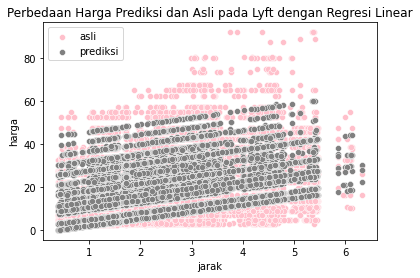

In [36]:
# Regresi Linear untuk Lyft

# Mendefinisikan model
lr = LinearRegression() 

# Fit model
lr_model_lyft = lr.fit(train_X_lyft, train_y_lyft)
pred_y_lyft = lr_model_lyft .predict(test_X_lyft)

# Menampilkan hasil uji
r2_lr_train_lyft = lr.score(train_X_lyft, train_y_lyft)
print('R2 Regresi Linear Train: %.4f' % r2_lr_train_lyft)

r2_lr_test_lyft = lr.score(test_X_lyft, test_y_lyft)
print('R2 Regresi Linear Test: %.4f' % r2_lr_test_lyft)

mse_lr_lyft = mean_squared_error(pred_y_lyft, test_y_lyft)
mse_lr_lyft = np.sqrt(mse_lr_lyft)
print('RMSE Test Regresi Linear: %.4f' % mse_lr_lyft)

errors_lyft = abs(pred_y_lyft-test_y_lyft)
mape_lyft = 100 * (errors_lyft  / test_y_lyft)
akurasi_lr_lyft = 100 - np.mean(mape_lyft)
print('Akurasi Regresi Linear:', round(akurasi_lr_lyft, 2), '%.')

# Membuat scatter plot
fig, ax = plt.subplots()
sns.scatterplot(x=test_X_lyft.jarak, y=test_y_lyft, ax=ax)
sns.scatterplot(x=test_X_lyft.jarak, y=pred_y_lyft, ax=ax)
plt.legend(labels=["asli","prediksi"])
plt.title("Perbedaan Harga Prediksi dan Asli pada Lyft dengan Regresi Linear")

In [37]:
intercept_lr_lyft=lr_model_lyft.intercept_
print('intercept : ', intercept_lr_lyft)
coef_lr_lyft = pd.concat([pd.Series(X_lyft.columns), pd.Series(lr_model_lyft.coef_)], axis=1)
coef_lr_lyft.columns = ['Variable','Coefficient']
coef_lr_lyft.transpose()

intercept :  -99056205302.00175


,0,1,2,3,4,5,6,7
Variable,jarak,lonjakan,Shared,Lux,Lyft,Lux Black XL,Lyft XL,Lux Black
Coefficient,3.23998,18.105279,99056205282.841537,99056205293.91066,99056205285.727356,99056205308.454941,99056205291.430298,99056205299.216766


R2 Regresi Linear Train: 0.9203
R2 Regresi Linear Test: 0.9186
RMSE Test Regresi Linear: 2.4420
Akurasi Regresi Linear: 88.12 %.


Text(0.5, 1.0, 'Perbedaan Harga Prediksi dan Asli pada Uber dengan Regresi Linear')

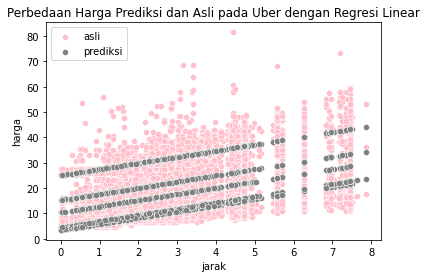

In [38]:
# Regresi Linear untuk Uber

# Mendefinisikan model
lr = LinearRegression() 

# Fit model
lr_model_uber = lr.fit(train_X_uber, train_y_uber)
pred_y_uber = lr_model_uber.predict(test_X_uber)

# Menampilkan hasil uji
r2_lr_train_uber = lr.score(train_X_uber, train_y_uber)
print('R2 Regresi Linear Train: %.4f' % r2_lr_train_uber )

r2_lr_test_uber = lr.score(test_X_uber, test_y_uber)
print('R2 Regresi Linear Test: %.4f' % r2_lr_test_uber)

mse_lr_uber = mean_squared_error(pred_y_uber, test_y_uber)
mse_lr_uber = np.sqrt(mse_lr_uber)
print('RMSE Test Regresi Linear: %.4f' % mse_lr_uber)

errors_uber = abs(pred_y_uber-test_y_uber)
mape_uber = 100 * (errors_uber / test_y_uber)
akurasi_lr_uber = 100 - np.mean(mape_uber)
print('Akurasi Regresi Linear:', round(akurasi_lr_uber, 2), '%.')

# Membuat scatter plot
fig, ax = plt.subplots()
sns.scatterplot(x=test_X_uber.jarak, y=test_y_uber, ax=ax)
sns.scatterplot(x=test_X_uber.jarak, y=pred_y_uber, ax=ax)
plt.legend(labels=["asli","prediksi"])
plt.title("Perbedaan Harga Prediksi dan Asli pada Uber dengan Regresi Linear")

In [39]:
intercept_lr_uber=lr_model_uber.intercept_
print('intercept : ', intercept_lr_uber)
coef_lr_uber = pd.concat([pd.Series(X_uber.columns), pd.Series(lr_model_uber.coef_)], axis=1)
coef_lr_uber.columns = ['Variable','Coefficient']
coef_lr_uber.transpose()

intercept :  26537204771.381866


,0,1,2,3,4,5,6
Variable,jarak,UberXL,Black,UberX,WAV,Black SUV,UberPool
Coefficient,2.441787,-26537204761.077236,-26537204756.205452,-26537204766.958977,-26537204766.964355,-26537204746.447582,-26537204767.97723


## LASSO

LASSO alpha : 0.003917713848445861
R2 LASSO Train: 0.9364
R2 LASSO Test: 0.9366
RMSE test LASSO: 2.5293
Akurasi LASSO: 85.03 %.


Text(0.5, 1.0, 'Perbedaan Harga Prediksi dan Asli pada Lyft dengan LASSO')

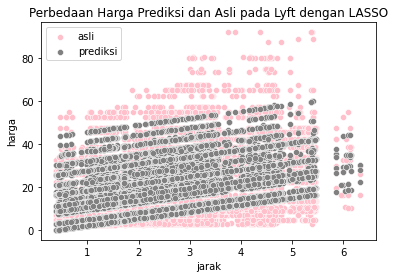

In [40]:
# LASSO untuk Lyft
#cv
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# definisi model
lasso_model_lyft = LassoCV(cv=cv)

#fit model
lasso_model_lyft.fit(train_X_lyft, train_y_lyft)
pred_y_lyft =lasso_model_lyft.predict(test_X_lyft)

# menampilkan lamda yang memproduksi MSE test paling kecil 
print('LASSO alpha :', lasso_model_lyft.alpha_)

# menampilkan hasil uji
r2_lasso_train_lyft = lasso_model_lyft.score(train_X_lyft, train_y_lyft)
print('R2 LASSO Train: %.4f' % r2_lasso_train_lyft )

r2_lasso_test_lyft = lasso_model_lyft.score(test_X_lyft, test_y_lyft)
print('R2 LASSO Test: %.4f' % r2_lasso_test_lyft)

mse_lasso_lyft = mean_squared_error(pred_y_lyft, test_y_lyft)
mse_lasso_lyft = np.sqrt(mse_lasso_lyft)
print('RMSE test LASSO: %.4f' % mse_lasso_lyft)

errors = abs(pred_y_lyft-test_y_lyft)
mape = 100 * (errors / test_y_lyft)
akurasi_lasso_lyft = 100 - np.mean(mape)
print('Akurasi LASSO:', round(akurasi_lasso_lyft, 2), '%.')

# Membuat scatter plot
fig, ax = plt.subplots()
sns.scatterplot(x=test_X_lyft.jarak, y=test_y_lyft, ax=ax)
sns.scatterplot(x=test_X_lyft.jarak, y=pred_y_lyft, ax=ax)
plt.legend(labels=["asli","prediksi"])
plt.title("Perbedaan Harga Prediksi dan Asli pada Lyft dengan LASSO")

In [41]:
intercept_lasso_lyft=lasso_model_lyft.intercept_
print('intercept : ', intercept_lasso_lyft)
coef_lasso_lyft = pd.concat([pd.Series(X_lyft.columns), pd.Series(lasso_model_lyft.coef_)], axis=1)
coef_lasso_lyft.columns = ['Variable','Coefficient']
coef_lasso_lyft.transpose()

intercept :  -7.8965107383109405


,0,1,2,3,4,5,6,7
Variable,jarak,lonjakan,Shared,Lux,Lyft,Lux Black XL,Lyft XL,Lux Black
Coefficient,3.23764,17.898765,-11.028088,0.0,-8.134862,14.545428,-2.432382,5.308261


LASSO alpha : 0.003384940758989759
R2 LASSO Train: 0.9203
R2 LASSO Test: 0.9186
RMSE test LASSO: 2.4422
Akurasi LASSO: 88.14 %.


Text(0.5, 1.0, 'Perbedaan Harga Prediksi dan Asli pada Uber dengan LASSO')

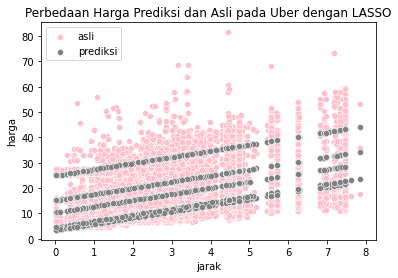

In [42]:
# LASSO untuk Uber
#cv
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#definisi model
lasso_model_uber = LassoCV(cv=cv)

#fit model
lasso_model_uber.fit(train_X_uber, train_y_uber)
pred_y_uber =lasso_model_uber.predict(test_X_uber)

#menampilkan lamda yang akan membuat RMSE paling rendah
print('LASSO alpha :', lasso_model_uber.alpha_)

#menampilkan hasil uji
r2_lasso_train_uber = lasso_model_uber.score(train_X_uber, train_y_uber)
print('R2 LASSO Train: %.4f' % r2_lasso_train_uber )

r2_lasso_test_uber = lasso_model_uber.score(test_X_uber, test_y_uber)
print('R2 LASSO Test: %.4f' % r2_lasso_test_uber)

mse_lasso_uber = mean_squared_error(pred_y_uber, test_y_uber)
mse_lasso_uber = np.sqrt(mse_lasso_uber)
print('RMSE test LASSO: %.4f' % mse_lasso_uber)

errors = abs(pred_y_uber-test_y_uber)
mape = 100 * (errors / test_y_uber)
akurasi_lasso_uber = 100 - np.mean(mape)
print('Akurasi LASSO:', round(akurasi_lasso_uber, 2), '%.')

# Membuat scatter plot
fig, ax = plt.subplots()
sns.scatterplot(x=test_X_uber.jarak, y=test_y_uber, ax=ax)
sns.scatterplot(x=test_X_uber.jarak, y=pred_y_uber, ax=ax)
plt.legend(labels=["asli","prediksi"])
plt.title("Perbedaan Harga Prediksi dan Asli pada Uber dengan LASSO")

In [43]:
intercept_lasso_uber=lasso_model_uber.intercept_
print('intercept : ', intercept_lasso_uber)
coef_lasso_uber = pd.concat([pd.Series(X_uber.columns), pd.Series(lasso_model_uber.coef_)], axis=1)
coef_lasso_uber.columns = ['Variable','Coefficient']
coef_lasso_uber.transpose()

intercept :  10.267846241896653


,0,1,2,3,4,5,6
Variable,jarak,UberXL,Black,UberX,WAV,Black SUV,UberPool
Coefficient,2.439354,0.025233,4.89451,-5.821061,-5.82562,14.650814,-6.838675


## Gradient Boosting

R2 Gradient Boosting Regressor Train: 0.9759
R2 Gradient Boosting Regressor Test: 0.9758
Gradient Boosting RMSE: 2.5293
Akurasi Gradient Boosting: 85.03 %.


Text(0.5, 1.0, 'Perbedaan Harga Prediksi dan Asli pada Lyft dengan Regresi Linear')

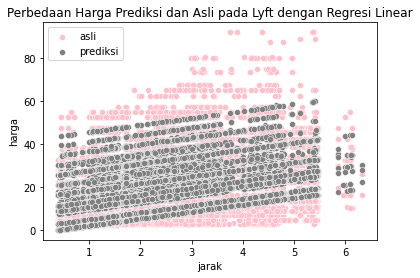

In [44]:
# GBR untuk lyft

# mendefinisikan model
gbr_lyft = ensemble.GradientBoostingRegressor()

# fit model
gbr_lyft.fit(train_X_lyft, train_y_lyft)

# menampilkan hasil uji
r2_gbr_train_lyft = gbr_lyft.score(train_X_lyft, train_y_lyft)
print('R2 Gradient Boosting Regressor Train: %.4f' % r2_gbr_train_lyft )

r2_gbr_test_lyft  = gbr_lyft.score(test_X_lyft, test_y_lyft)
print('R2 Gradient Boosting Regressor Test: %.4f' % r2_gbr_test_lyft)

y_pred = gbr_lyft.predict(test_X_lyft)
mse_gbr_lyft = mean_squared_error(pred_y_lyft, test_y_lyft)
mse_gbr_lyft = np.sqrt(mse_gbr_lyft)
print('Gradient Boosting RMSE: %.4f' % mse_gbr_lyft)

errors_lyft = abs(pred_y_lyft-test_y_lyft)
mape_lyft = 100 * (errors_lyft  / test_y_lyft)
akurasi_gbr_lyft = 100 - np.mean(mape_lyft)
print('Akurasi Gradient Boosting:', round(akurasi_gbr_lyft, 2), '%.')

# Membuat scatter plot
fig, ax = plt.subplots()
sns.scatterplot(x=test_X_lyft.jarak, y=test_y_lyft, ax=ax)
sns.scatterplot(x=test_X_lyft.jarak, y=pred_y_lyft, ax=ax)
plt.legend(labels=["asli","prediksi"])
plt.title("Perbedaan Harga Prediksi dan Asli pada Lyft dengan Regresi Linear")

R2 Gradient Boosting Regressor Train: 0.9477
R2 Gradient Boosting Regressor Test: 0.9462
Gradient Boosting RMSE: 2.4422
Akurasi Gradient Boosting: 88.14 %.


Text(0.5, 1.0, 'Perbedaan Harga Prediksi dan Asli pada uber dengan Regresi Linear')

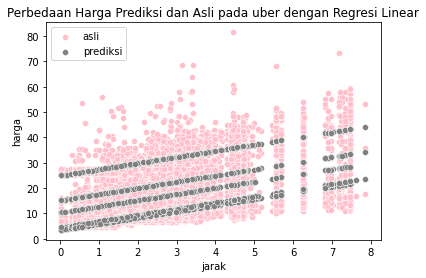

In [45]:
# GBR untuk uber

# mendefinisikan model
gbr_uber= ensemble.GradientBoostingRegressor()

# fit model
gbr_uber.fit(train_X_uber, train_y_uber)

# menampilkan hasil uji
r2_gbr_train_uber = gbr_uber.score(train_X_uber, train_y_uber)
print('R2 Gradient Boosting Regressor Train: %.4f' % r2_gbr_train_uber )

r2_gbr_test_uber = gbr_uber.score(test_X_uber, test_y_uber)
print('R2 Gradient Boosting Regressor Test: %.4f' % r2_gbr_test_uber)

y_pred = gbr_uber.predict(test_X_uber)
mse_gbr_uber = mean_squared_error(pred_y_uber, test_y_uber)
mse_gbr_uber = np.sqrt(mse_gbr_uber)
print('Gradient Boosting RMSE: %.4f' % mse_gbr_uber)

errors_uber = abs(pred_y_uber-test_y_uber)
mape_uber = 100 * (errors_uber  / test_y_uber)
akurasi_gbr_uber = 100 - np.mean(mape_uber)
print('Akurasi Gradient Boosting:', round(akurasi_gbr_uber, 2), '%.')

# Membuat scatter plot
fig, ax = plt.subplots()
sns.scatterplot(x=test_X_uber.jarak, y=test_y_uber, ax=ax)
sns.scatterplot(x=test_X_uber.jarak, y=pred_y_uber, ax=ax)
plt.legend(labels=["asli","prediksi"])
plt.title("Perbedaan Harga Prediksi dan Asli pada uber dengan Regresi Linear")

# Evaluasi Model

In [46]:
# membuat tabel perbandingan model yang digunakan pada Lyft
lyft_data = {"Model": ["Regresi Linear", "LASSO", "Gradient Boosting"], 
"Train R2": [r2_lr_train_lyft,r2_lasso_train_lyft, r2_gbr_train_lyft],
"Test R2": [r2_lr_test_lyft,r2_lasso_test_lyft, r2_gbr_test_lyft],
"Test RMSE": [mse_lr_lyft,mse_lasso_lyft,mse_gbr_lyft],
"Accuracy": [akurasi_lr_lyft, akurasi_lasso_lyft, akurasi_gbr_lyft]}

# membuat tabel perbandingan model yang digunakan pada Uber
uber_data = {"Model": ["Regresi Linear", "LASSO", "Gradient Boosting"], 
"Train R2": [r2_lr_train_uber,r2_lasso_train_uber, r2_gbr_train_uber],
"Test R2": [r2_lr_test_uber,r2_lasso_test_uber, r2_gbr_test_uber],
"Test RMSE": [mse_lr_uber, mse_lasso_uber,mse_gbr_uber],
"Accuracy": [akurasi_lr_uber, akurasi_lasso_uber, akurasi_gbr_uber]}

tabel_ringkasan_lyft = pd.DataFrame(lyft_data)
print('Ringkasan Evaluasi Model pada Lyft')
display(tabel_ringkasan_lyft)
tabel_ringkasan_uber = pd.DataFrame(uber_data)
print('Ringkasan Evaluasi Model pada Uber')
display(tabel_ringkasan_uber)

Ringkasan Evaluasi Model pada Lyft


,Model,Train R2,Test R2,Test RMSE,Accuracy
0,Regresi Linear,0.936380,0.936634,2.528658,84.979110
1,LASSO,0.936367,0.936603,2.529275,85.034373
2,Gradient Boosting,0.975853,0.975842,2.529275,85.034373


Ringkasan Evaluasi Model pada Uber


,Model,Train R2,Test R2,Test RMSE,Accuracy
0,Regresi Linear,0.920284,0.918624,2.441970,88.118045
1,LASSO,0.920278,0.918611,2.442165,88.142492
2,Gradient Boosting,0.947703,0.946214,2.442165,88.142492


- model terbaik diperoleh dengan menggunakan Gradien Boosting
- dengan menggunakan model regresi linear dan LASSO dapat menjelaskan metode perhitungan harga dengan menerapkan koefisien - koefisiennya
- karena LASSO memiliki nilai akurasi lebih besar dari Regresi Linear maka model penentuan harga menggunakan LASSO

In [47]:
# ringkasan koefisien dan intercept pada Uber
intercept_lr_ubr = {'Coefficient':intercept_lr_uber, 'Variable':'Intercept'}
coef_lr_uber=coef_lr_uber.append(intercept_lr_ubr , ignore_index=True)
coef_lr_uber.rename(columns={'Coefficient':'LR'}, inplace=True)

intercept_ls_ubr = {'Coefficient':intercept_lasso_uber, 'Variable':'Intercept'}
coef_lasso_uber=coef_lasso_uber.append(intercept_ls_ubr, ignore_index=True)
coef_lasso_uber.drop(['Variable'],axis=1,inplace=True)
coef_lasso_uber.rename(columns={'Coefficient':'LASSO'}, inplace=True)

print('Data Koefisien dan Intercept pada Uber')
koefisien_uber=  pd.concat([coef_lr_uber, coef_lasso_uber], axis=1)
koefisien_uber.transpose()


Data Koefisien dan Intercept pada Uber


,0,1,2,3,4,5,6,7
Variable,jarak,UberXL,Black,UberX,WAV,Black SUV,UberPool,Intercept
LR,2.441787,-26537204761.077236,-26537204756.205452,-26537204766.958977,-26537204766.964355,-26537204746.447582,-26537204767.97723,26537204771.381866
LASSO,2.439354,0.025233,4.89451,-5.821061,-5.82562,14.650814,-6.838675,10.267846


penentuan harga pada Uber dapat ditulis sebagai berikut untuk penentuan harga menggunakan LASSO
- $ Harga = 10.267846 + jarak * 2.439354 + tipe taksi * koefisien$

In [48]:
lasso_model_uber.predict([[1.5,0,0,0,1,0,0]])

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(


array([8.10125722])

In [49]:
# ringkasan koefisien dan intercept pada Lyft
intercept_lr_ly = {'Coefficient':intercept_lr_lyft, 'Variable':'Intercept'}
coef_lr_lyft=coef_lr_lyft.append(intercept_lr_ly , ignore_index=True)
coef_lr_lyft.rename(columns={'Coefficient':'LR'}, inplace=True)

intercept_ls_ly = {'Coefficient':intercept_lasso_lyft, 'Variable':'Intercept'}
coef_lasso_lyft=coef_lasso_lyft.append(intercept_ls_ly, ignore_index=True)
coef_lasso_lyft.drop(['Variable'],axis=1,inplace=True)
coef_lasso_lyft.rename(columns={'Coefficient':'LASSO'}, inplace=True)

print('Data Koefisien dan Intercept pada Lyft')
koefisien_lyft=  pd.concat([coef_lr_lyft, coef_lasso_lyft], axis=1)
koefisien_lyft.transpose()

Data Koefisien dan Intercept pada Lyft


,0,1,2,3,4,5,6,7,8
Variable,jarak,lonjakan,Shared,Lux,Lyft,Lux Black XL,Lyft XL,Lux Black,Intercept
LR,3.23998,18.105279,99056205282.841537,99056205293.91066,99056205285.727356,99056205308.454941,99056205291.430298,99056205299.216766,-99056205302.001755
LASSO,3.23764,17.898765,-11.028088,0.0,-8.134862,14.545428,-2.432382,5.308261,-7.896511


penentuan harga pada Uber dapat ditulis sebagai berikut untuk penentuan harga menggunakan LASSO
- $ Harga = -7.896511 + jarak * 3.23764 + lonjakan*17.898765	 + tipe taksi * koefisien$

In [50]:
lasso_model_lyft.predict([[1.5,1,0,1,0,0,0,0]])

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(


array([14.85871358])

# Kesimpulan

Berdasarkan eksplorasi dan pemodelan kita mendapatkan kesimpulan bahwa:
- Tidak ditemukan duplikat data
- Pada dataset ini terdapat mising value pada kolom price sebanyak 55095
- Pada perbandingan harga antara kedua merk diketahui Lyft memiliki harga rata - rata lebih tinggi dari Uber terutama di layanan taksi mewahnya yaitu Lux Black XL, tetapi memiliki harga yang paling rendah untuk layanan taksi 'shared' nya. Hal ini didudukng oleh penentuan harga berdasarkan jaraknya jauh lebih tinggi dari Uber dan ditentukan pula oleh lonjakan pesanan pada saat itu, serta koefisien untuk taksi Lux Black XL yang tinggi. Lyft akan jauh lebih murah saat menggunakan tipe taksi Shared karena memiliki pengurangan harga hingga -11
- Dari merk Lyft kita tahu bahwa penentuan harga ditentukan oleh jarak, tipe taksi, dan lonjakan pesanan. Sedangkan unyuk merk Uber penentuan harganya ditentukan oleh jarak dan tipe taksi yang digunakan 
- Penetapan harga dari merk Uber dan Lyft dapat menggunakan LASSO dengan akurasi sebesar 85% untuk Lyft dan 88% untuk Uber

In [51]:
pickle.dump(lasso_model_lyft , open('model_classifier-lyft.pkl','wb'))

In [52]:
pickle.dump(lasso_model_uber , open('model_classifier-uber.pkl','wb'))